In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 22
})

In [2]:
G = {
    "A": [("B", 2), ("C", 5)],
    "B": [("C", 1)],
    "C": [],
}
pos = {
    "A": (0, 0),
    "B": (2, 0),
    "C": (1, 1),
}


(0.0, 1.0, 0.0, 1.0)

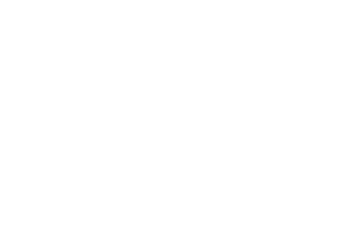

In [3]:
fig, ax = plt.subplots()
ax.axis('off') 

In [4]:
from IPython.display import HTML
from heapq import heappop, heappush

file = []
heappush(file, (0, "A"))
dist = {
    "A": "$\infty$",
    "B": "$\infty$",
    "C": "$\infty$",
}

T = {}
for v in pos:
    x, y = pos[v]
    ax.scatter(x, y, s=100)
    T[v] = ax.text(x, y, dist[v])

def init():
    for v in T:
        dist[v] = "$\infty$"
        T[v].set_text(dist[v])
    return [T[v] for v in T]

def update(i):
    if file:
        d, u = heappop(file)
        if dist[u] == "$\infty$" or d < int(dist[u]):
            dist[u] = str(d)
            T[u].set_text(str(d))
            for v, w in G[u]:
                heappush(file, (d + w, v))
            return T[u],
    return T["A"],

anim = FuncAnimation(fig, update, frames=5, interval=2000, blit=False)
# anim.save('anim.gif')
HTML(anim.to_html5_video())

[]
[(5, 'C')]
[(5, 'C')]
